In [1]:
from tensorflow import keras 
from tensorflow.keras import layers


2022-01-25 20:33:15.453704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 20:33:15.453722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
from tensorflow.keras.datasets import mnist
  
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255 
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 50s 51ms/step - loss: 0.3573 - accuracy: 0.8850
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0481 - accuracy: 0.9842
Epoch 3/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0164 - accuracy: 0.9950


In [3]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f"Test accuracy :{test_acc:.3f}")

313/313 [==============================] - 4s 10ms/step - loss: 0.0292 - accuracy: 0.9907
Test accuracy :0.991


In [10]:
import os, shutil, pathlib

In [11]:
original_dir = pathlib.Path("train")                           
new_base_dir = pathlib.Path("c8")              
 


In [ ]:
def make_subset(subset_name, start_index, end_index):          
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=new_base_dir/original_dir / fname,
                            dst=dir / fname)

In [12]:
print(original_dir)
print(new_base_dir)

train
c8


In [14]:
make_subset("train", start_index=0, end_index=1000)            
make_subset("validation", start_index=1000, end_index=1500)    
make_subset("test", start_index=1500, end_index=2500)

In [12]:
inputs= keras.Input(shape=(180,180,3))
x= layers.Rescaling(1./255)(inputs)
x=layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x= layers.Flatten()(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [14]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

In [26]:
train_dataset=image_dataset_from_directory(new_base_dir/"train",
                                         image_size=(180,180),
                                         batch_size=32)
validation_dataset= image_dataset_from_directory( new_base_dir/"validation",
                                                image_size=(180,180),
                                                batch_size=32)
test_dataset= image_dataset_from_directory(new_base_dir/"test",
                                          image_size=(180,180),
                                          batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Usage of tensorflow dataset built in methods

In [18]:
import numpy as np 
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [19]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i>=2:
        break

(16,)
(16,)
(16,)


In [22]:
batched_dataset= dataset.batch(32)
for i , element in enumerate(batched_dataset):
    print(element.shape)
    if(i>=2):
        break

(32, 16)
(32, 16)
(32, 16)


In [23]:
reshaped_dataset= dataset.map(lambda x: tf.reshape(x, (4,4)))
for i , element in enumerate(reshaped_dataset):
    print(element.shape)
    if(i>=2):
        break

(4, 4)
(4, 4)
(4, 4)


## Continuing with original data

In [27]:
for data_batch, labels_batch in train_dataset:
    print("Data batch shape: ",data_batch.shape)
    print("Labels batch shape: ", labels_batch.shape)
    break
    

Data batch shape:  (32, 180, 180, 3)
Labels batch shape:  (32,)


In [31]:
callbacks=[ keras.callbacks.ModelCheckpoint(filepath= "covnet_from_scratch.keras",
                                          monitor="val_loss",
                                          save_best_only=True)]

In [32]:
history= model.fit(train_dataset,
                  epochs=30,
                  validation_data=validation_dataset,
                  callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 36s 563ms/step - loss: 0.7341 - accuracy: 0.5370 - val_loss: 0.6890 - val_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - 37s 591ms/step - loss: 0.6971 - accuracy: 0.5565 - val_loss: 0.7288 - val_accuracy: 0.5090
Epoch 3/30
63/63 [==============================] - 38s 598ms/step - loss: 0.6674 - accuracy: 0.5975 - val_loss: 0.6703 - val_accuracy: 0.5920
Epoch 4/30
63/63 [==============================] - 38s 604ms/step - loss: 0.6281 - accuracy: 0.6660 - val_loss: 0.8251 - val_accuracy: 0.5460
Epoch 5/30
63/63 [==============================] - 38s 597ms/step - loss: 0.5798 - accuracy: 0.6895 - val_loss: 0.6397 - val_accuracy: 0.6380
Epoch 6/30
63/63 [==============================] - 38s 607ms/step - loss: 0.5533 - accuracy: 0.7260 - val_loss: 0.6888 - val_accuracy: 0.6790
Epoch 7/30
63/63 [==============================] - 39s 614ms/step - loss: 0.5057 - accuracy: 0.7660 - val_loss: 0.5952 - val_accuracy: 0.6660

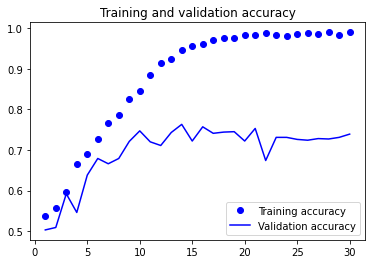

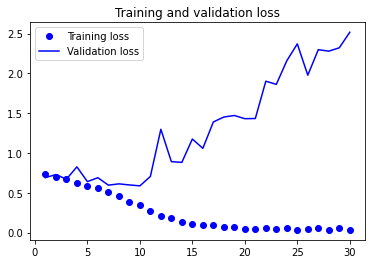

In [33]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [35]:
test_model = keras.models.load_model("covnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 152ms/step - loss: 0.6298 - accuracy: 0.7310
Test accuracy: 0.731


### Data Augmentation

In [36]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

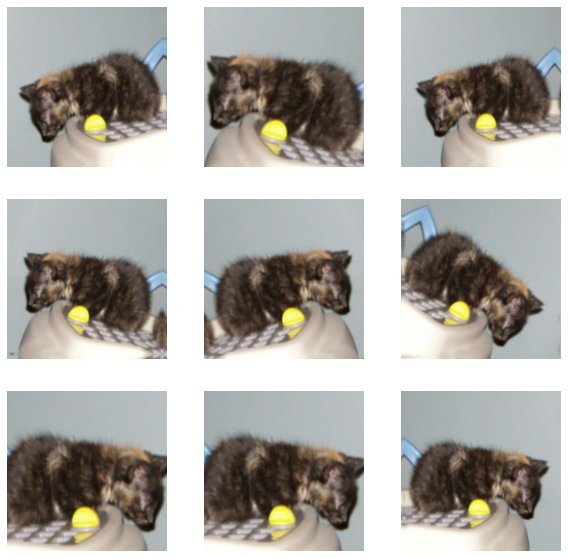

In [38]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_dataset.take(1):                           
    for i in range(9):
        augmented_images = data_augmentation(images)              
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[1].numpy().astype("uint8"))   
        plt.axis("off")

In [41]:
inputs= keras.Input(shape=(180,180,3))
x=data_augmentation(inputs)
x= layers.Rescaling(1./255)(x)
x=layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x= layers.Flatten()(x)
x=layers.Dropout(0.5)(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs=inputs, outputs=outputs)

In [44]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [46]:
callbacks=[
    keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_using_augmentation.keras",
                                   monitor="val_loss",
                                   save_best_only=True)
]

In [47]:
history= model.fit(train_dataset,
                  epochs=30,
                  validation_data=validation_dataset,
                  callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 38s 606ms/step - loss: 0.6838 - accuracy: 0.5935 - val_loss: 0.7429 - val_accuracy: 0.5420
Epoch 2/30
63/63 [==============================] - 40s 641ms/step - loss: 0.6646 - accuracy: 0.6280 - val_loss: 0.6426 - val_accuracy: 0.6280
Epoch 3/30
63/63 [==============================] - 41s 649ms/step - loss: 0.6577 - accuracy: 0.6270 - val_loss: 0.6207 - val_accuracy: 0.6590
Epoch 4/30
63/63 [==============================] - 40s 637ms/step - loss: 0.6330 - accuracy: 0.6525 - val_loss: 0.6167 - val_accuracy: 0.6450
Epoch 5/30
63/63 [==============================] - 40s 634ms/step - loss: 0.6132 - accuracy: 0.6725 - val_loss: 0.7430 - val_accuracy: 0.5980
Epoch 6/30
63/63 [==============================] - 41s 649ms/step - loss: 0.5905 - accuracy: 0.6925 - val_loss: 0.6298 - val_accuracy: 0.6470
Epoch 7/30
63/63 [==============================] - 41s 649ms/step - loss: 0.5975 - accuracy: 0.6880 - val_loss: 0.7770 - val_accuracy: 0.5770

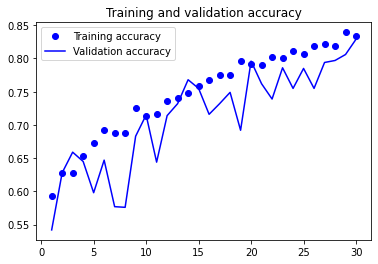

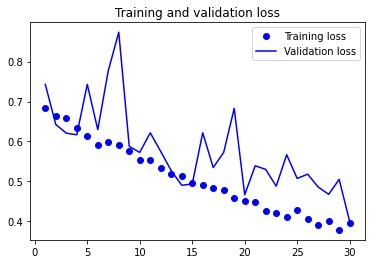

In [48]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [50]:
test_model = keras.models.load_model(
    "convnet_from_scratch_using_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 116ms/step - loss: 0.4442 - accuracy: 0.8020
Test accuracy: 0.802


In [51]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 10s 0us/step


In [52]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [57]:
train_dataset=image_dataset_from_directory(new_base_dir/"train",
                                         image_size=(180,180),
                                         batch_size=1)
validation_dataset= image_dataset_from_directory( new_base_dir/"validation",
                                                image_size=(180,180),
                                                batch_size=1)
test_dataset= image_dataset_from_directory(new_base_dir/"test",
                                          image_size=(180,180),
                                          batch_size=1)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [58]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
  
train_features, train_labels =  get_features_and_labels(train_dataset)


KeyboardInterrupt: 

In [ ]:
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)